# TITANIC PASSENGERS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel("titanic-passengers.xlsx")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


<b>Use of the .info() method to look at some general information about the data columns and values</b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# PART 1. MISSING DATA

<b>1. Count of null values per column</b>

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<u>There is missing data in three columns</u>
- Age : 177
- Cabin : 687
- Embarked : 2

<b>2. Missing data in the column "Age"</b>

Solution : replace missing data by the median age

In [6]:
median_age = df.Age.median()
median_age

28.0

In [7]:
df.Age.fillna(median_age, inplace=True)

Checking: 

In [8]:
df.Age.isnull().sum()

0

OK : there is no more missing data.

<b>3. Missing data in the column "Cabin"</b>

Solution : since there is too much missing data, delete the entire column

In [9]:
df.drop(['Cabin'], axis='columns', inplace=True)

Checking :

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


OK : column dropped.

<b>4. Missing data in the column "Embarked"</b>

Solution : replace missing data by the mode (the port with the greatest number of embarkations)

In [11]:
mode = df.Embarked.mode()
mode

0    S
dtype: object

In [12]:
df.Embarked.fillna(mode[0], inplace=True)

Checking:

In [13]:
df.Embarked.isnull().sum()

0

OK : there is no more missing data.

<b>5. Final check of changes</b>

In [14]:
df.shape

(891, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Part 2. VISUALIZATION

<b> Use of the .describe() method to understand the central tendencies of the data</b>

In [16]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### A. Distribution of features

<b>1. Survived distribution</b>

<AxesSubplot:xlabel='Survived', ylabel='count'>

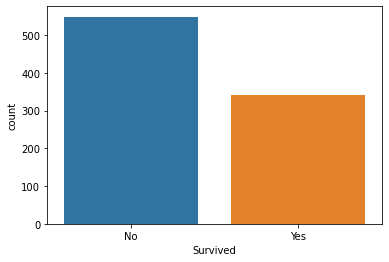

In [17]:
sns.countplot(x="Survived", data=df)

<b>2. Sex distribution</b>

<AxesSubplot:xlabel='Sex', ylabel='count'>

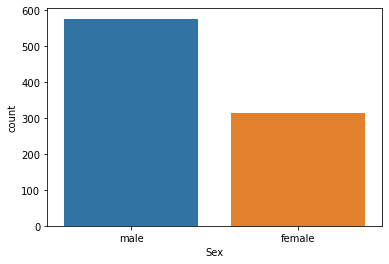

In [18]:
sns.countplot(x="Sex", data=df)

<b>3. Class distribution</b>

<AxesSubplot:xlabel='Pclass', ylabel='count'>

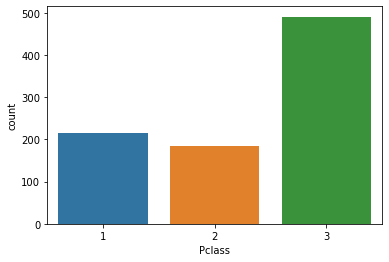

In [19]:
sns.countplot(x="Pclass", data=df)

<b>4. Age distribution</b>

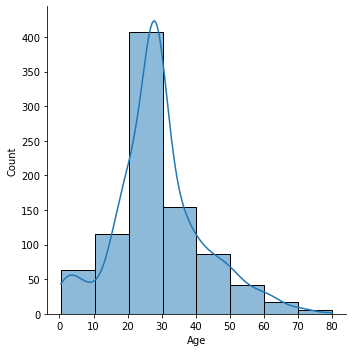

In [20]:
sns.displot(df.Age, kde=True, bins=8)

<b>5. SibSp distribution</b>

<AxesSubplot:xlabel='SibSp', ylabel='count'>

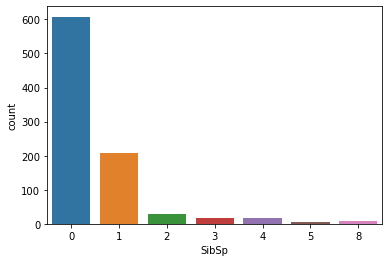

In [21]:
sns.countplot(x="SibSp", data=df)

<b>6. Parch distribution</b>

<AxesSubplot:xlabel='Parch', ylabel='count'>

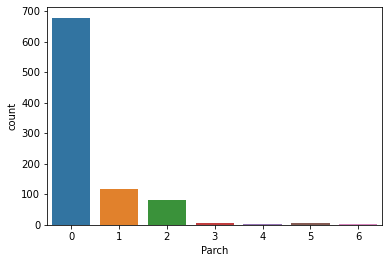

In [22]:
sns.countplot(x="Parch", data=df)

<b>7. Fare distribution</b>

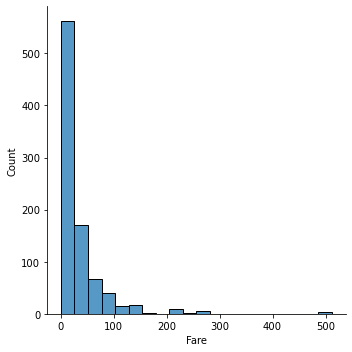

In [23]:
sns.displot(df.Fare, bins=20)

### B. Correlations between features

<b>1. Correlation between Age and Survived</b>

Categorization of the column "Age"

In [24]:
age_category = []

for age in df.Age:
    if age in range(0,11):
        age_category.append("Child")
    elif age in range(11,21):
        age_category.append("Young")
    elif age in range(21,51):
        age_category.append("Adult")
    else:
        age_category.append("Senior")
        
df['Age_category'] = age_category 
df.Age_category

0      Adult
1      Adult
2      Young
3      Adult
4      Adult
       ...  
886    Young
887    Adult
888    Adult
889    Adult
890    Young
Name: Age_category, Length: 891, dtype: object

<AxesSubplot:xlabel='Age_category', ylabel='count'>

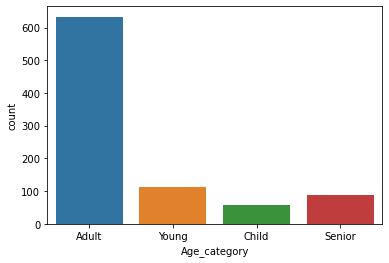

In [25]:
sns.countplot(x="Age_category", data=df)

<AxesSubplot:xlabel='Age_category', ylabel='count'>

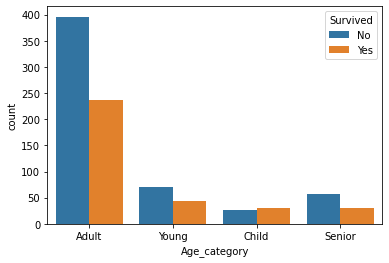

In [26]:
sns.countplot(x="Age_category", hue="Survived", data=df)

<b>2. Correlation between Sex and Survived</b>

<AxesSubplot:xlabel='Sex', ylabel='count'>

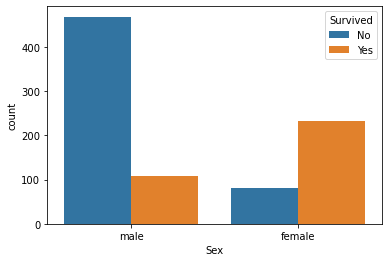

In [27]:
sns.countplot(x="Sex", hue="Survived", data=df)

<b>3. Correlation between Age, Sex and Survived</b>

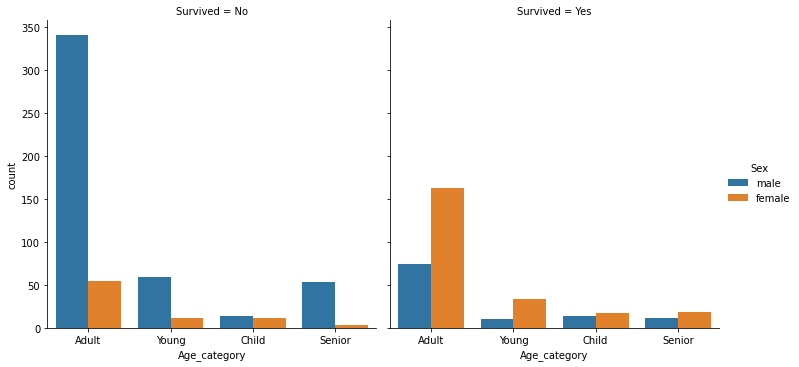

In [28]:
sns.catplot(x="Age_category", hue="Sex", col="Survived", data=df, kind="count")

<b>4. Correlation between Fare and Survived<b>

Categorization of the column "Fare"

In [29]:
fare_category = []

for fare in df.Fare:
    if int(fare) in range(0,26):
        fare_category.append("Very cheap")
    elif int(fare) in range(26,51):
        fare_category.append("Cheap")
    elif int(fare) in range(51,101):
        fare_category.append("Medium")
    else:
        fare_category.append("Expensive")
        
df['Fare_category'] = fare_category
df.Fare_category

0      Very cheap
1      Very cheap
2      Very cheap
3      Very cheap
4          Medium
          ...    
886         Cheap
887    Very cheap
888    Very cheap
889    Very cheap
890         Cheap
Name: Fare_category, Length: 891, dtype: object

<AxesSubplot:xlabel='Fare_category', ylabel='count'>

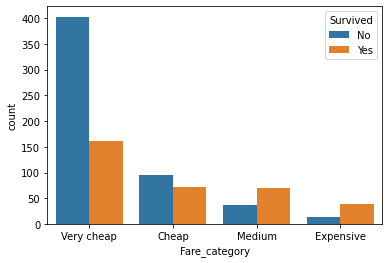

In [30]:
sns.countplot(x="Fare_category", hue="Survived", data=df, order=['Very cheap', 'Cheap', 'Medium', 'Expensive'])

### C. Correlation map

<b>Survived categorization</b>

In [31]:
encoder = LabelEncoder()
df["Survived"] = encoder.fit_transform(df["Survived"])
df["Survived"]

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 891, dtype: int32

0 : Dead
1 : Survived

<b>Sex categorization</b>

In [32]:
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Sex"]

0      1
1      1
2      1
3      0
4      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Sex, Length: 891, dtype: int32

<b>Embarked Categorization</b>

In [33]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
encoder = LabelEncoder()
df["Embarked"] = encoder.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      2
2      2
3      2
4      2
      ..
886    0
887    0
888    2
889    2
890    2
Name: Embarked, Length: 891, dtype: int32

<b> Plot correlation map </b>

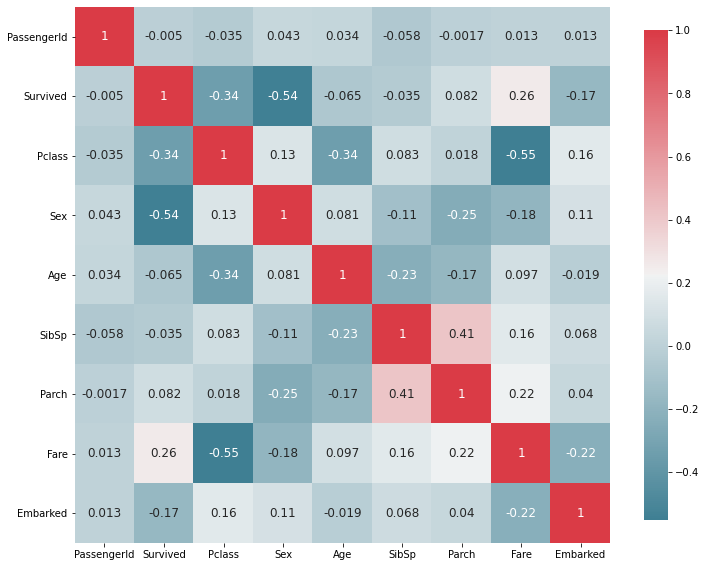

In [35]:
def plot_correlation_map(dataset):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

plot_correlation_map(df)

<b>A correlation map is a graphical representation of the correlation matrix for the variables in a data set.</b>
It measures how change in one variable is associated with change in another variable. The closer the correlation value is to -1 or 1 the stronger the association, the closer to 0, the weaker the association. 
    
Here, we see that <b>the four variables with greatest correlation to survival are (in that order) : gender, passenger class, fare and age.</b>

<b>Correlation between Pclass and Survived<b>

Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [36]:
class_survived = df.groupby('Pclass')['Survived'].mean()

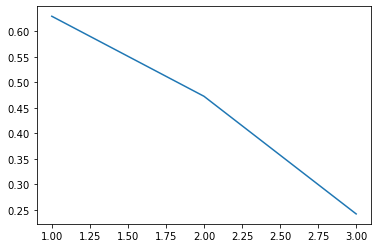

In [37]:
plt.plot(class_survived)

### D. Name column and Titles

In [38]:
df['Name']

0                             Collander, Mr. Erik Gustaf
1                                Moen, Mr. Sigurd Hansen
2                                 Jensen, Mr. Hans Peder
3            Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                                 Davidson, Mr. Thornton
                             ...                        
886                  Nasser, Mrs. Nicholas (Adele Achem)
887                                Sirayanian, Mr. Orsen
888                                  Cacic, Miss. Marija
889                     Petroff, Mr. Pastcho ("Pentcho")
890    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
Name: Name, Length: 891, dtype: object

<b>Function to extract the title from the column Names</b>

In [39]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [40]:
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title']

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Title, Length: 891, dtype: object

<b>Replace names by titles</b>

In [41]:
Title_Dictionary = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Lady" :      "Royalty",
                    "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mrs" :        "Mrs",
                    "Mr" :       "Mr",
                    "Master":     "Master"
                    }

In [42]:
df['Title'].replace(Title_Dictionary, inplace=True)

In [43]:
df['Title']

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Title, Length: 891, dtype: object

<b>Name column dropping</b>

In [44]:
df.drop("Name", axis=1, inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Age_category', 'Fare_category', 'Title'],
      dtype='object')

<b>Correlation between Title and Sex</b>

<AxesSubplot:xlabel='Title', ylabel='count'>

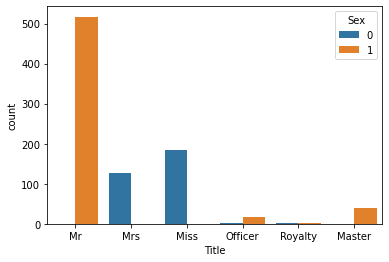

In [45]:
sns.countplot(x="Title", hue="Sex", data=df)

<b>Correlation between Title and Age</b>

<AxesSubplot:xlabel='Title', ylabel='count'>

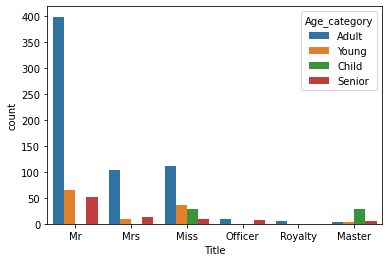

In [46]:
sns.countplot(x="Title", hue="Age_category", data=df)

<b>Correlation between Title and Fare</b>

<AxesSubplot:xlabel='Title', ylabel='count'>

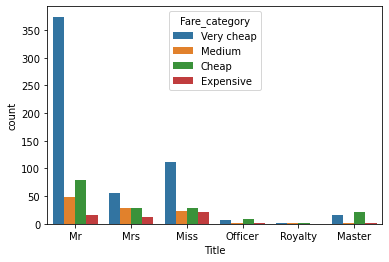

In [47]:
sns.countplot(x="Title", hue="Fare_category", data=df)

<b>Correlation between Title and Survived</b>

<AxesSubplot:xlabel='Title', ylabel='count'>

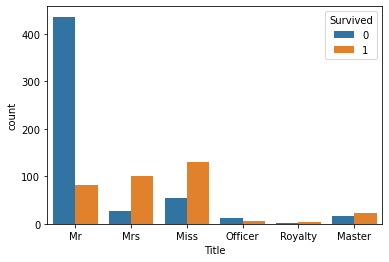

In [48]:
sns.countplot(x="Title", hue="Survived", data=df)

### D. Family size

In [49]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

<AxesSubplot:xlabel='Family_size', ylabel='count'>

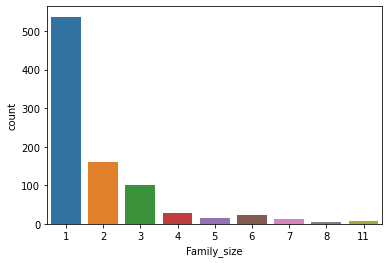

In [50]:
sns.countplot(x='Family_size', data=df)

<AxesSubplot:xlabel='Family_size', ylabel='count'>

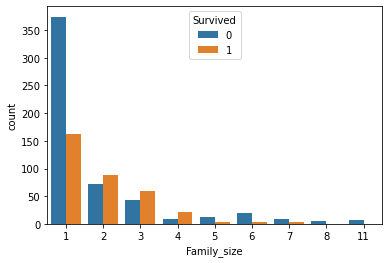

In [51]:
sns.countplot(x='Family_size', hue='Survived', data=df)

<b>It seems that families have a higher chance of survival than singles.
However too large families(over 5 members) have less chance to survive than small families.</b>